In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
lc_test = pd.read_table("/home/francisco/Escritorio/code/vsbms/data/BIASEDFATS/Test_rrlyr-3.csv", sep= ',')
lc_train = pd.read_table("/home/francisco/Escritorio/code/vsbms/data/BIASEDFATS/Train_rrlyr-3.csv", sep= ',')

In [3]:
predTrain = lc_train['Pred'].sample(1000)
predTest = lc_test['Pred'].sample(1000)

Text(0.5, 0, 'Probability of belonging to a true class')

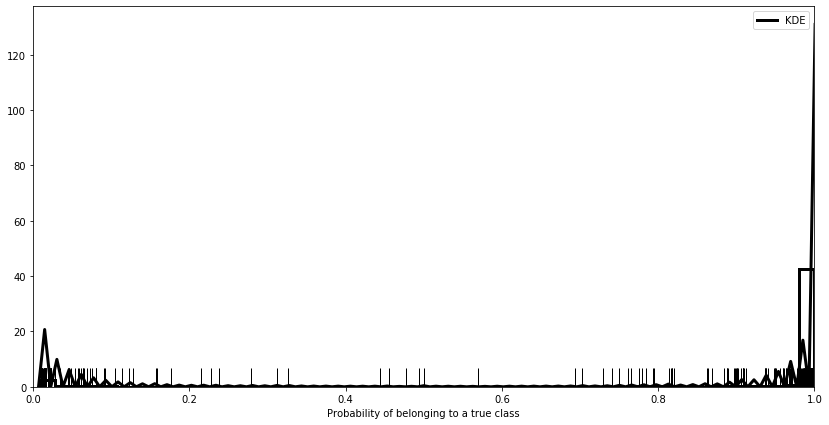

In [4]:
plt.figure(figsize=(14, 7))
plt.xlim(0,)
sns.distplot(predTest, rug=True, hist=True, color='black',  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "black"}, norm_hist=True);
plt.xlabel('Probability of belonging to a true class')

Text(0.5, 0, 'Probability of belonging to a true class')

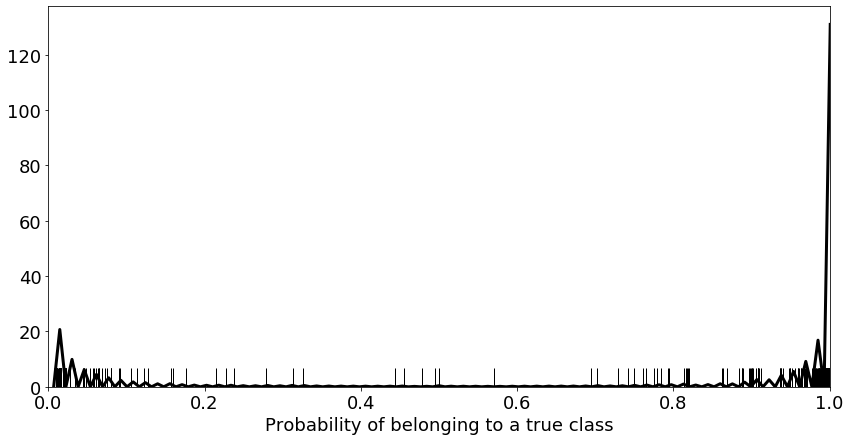

In [5]:
rc={'axes.labelsize': 18, 'font.size': 18, 'legend.fontsize': 18.0, 'axes.titlesize': 18}
plt.rcParams.update(**rc)

plt.figure(figsize=(14, 7))
plt.xlim(0,)
sns.distplot(predTest, rug=True, hist=False, color='black',  kde_kws={"color": "k", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "black"}, norm_hist=True);
plt.xlabel('Probability of belonging to a true class')

Text(0.5, 0, 'Probability of belonging to a true class')

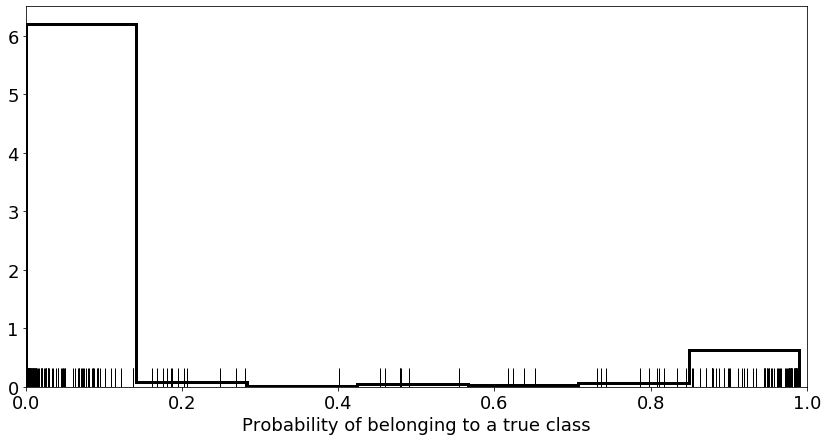

In [6]:
rc={'axes.labelsize': 18, 'font.size': 18, 'legend.fontsize': 18.0, 'axes.titlesize': 18}
plt.rcParams.update(**rc)

plt.figure(figsize=(14, 7))
plt.xlim(0,)
sns.distplot(1-predTrain, rug=True, hist=True, kde=False, color='black',  kde_kws={"color": "k", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "black"}, norm_hist=True, bins =7);
plt.xlabel('Probability of belonging to a true class')

In [7]:
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns

def upper_rugplot(data, height=.05, ax=None, **kwargs):
    from matplotlib.collections import LineCollection
    ax = ax or plt.gca()
    kwargs.setdefault("linewidth", 1)
    segs = np.stack((np.c_[data, data],
                     np.c_[np.ones_like(data), np.ones_like(data)-height]),
                    axis=-1)
    lc = LineCollection(segs, transform=ax.get_xaxis_transform(), **kwargs)
    ax.add_collection(lc)


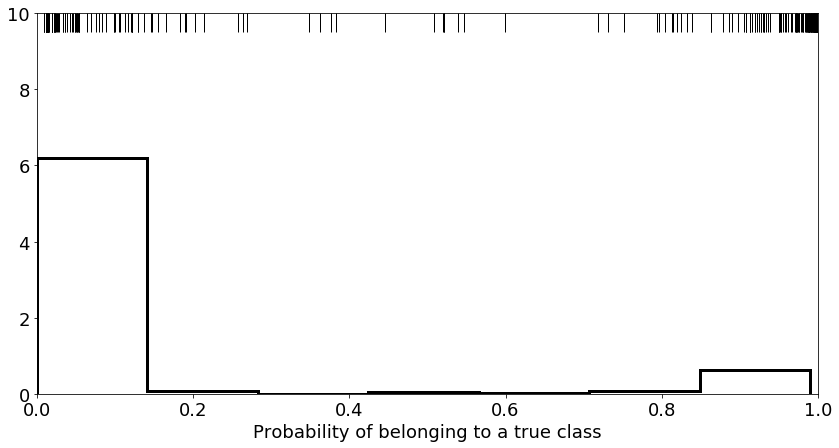

In [8]:
rc={'axes.labelsize': 18, 'font.size': 18, 'legend.fontsize': 18.0, 'axes.titlesize': 18}
plt.rcParams.update(**rc)


fig, ax = plt.subplots(figsize=(14, 7))
plt.xlim(0,)
sns.distplot(1-predTrain, rug=False, hist=True, kde=False, color='black',  kde_kws={"color": "k", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "black"}, norm_hist=True, bins =7);

upper_rugplot(predTrain, ax=ax, color='black')
plt.ylim(0,10)
plt.xlabel('Probability of belonging to a true class')
plt.show()

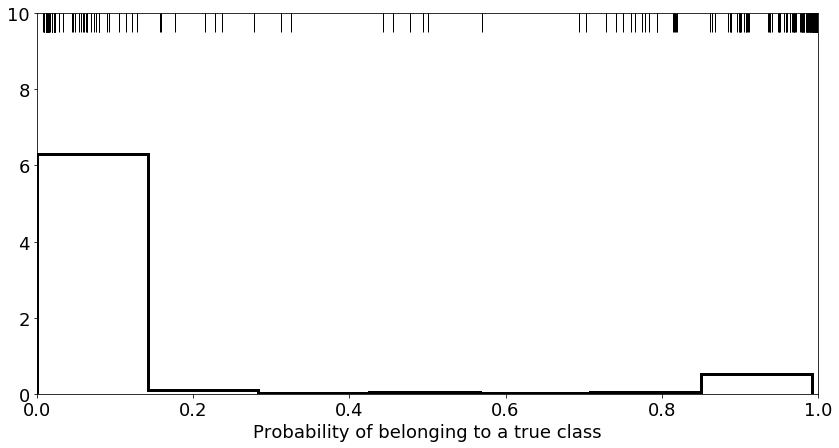

In [9]:
rc={'axes.labelsize': 18, 'font.size': 18, 'legend.fontsize': 18.0, 'axes.titlesize': 18}
plt.rcParams.update(**rc)


fig, ax = plt.subplots(figsize=(14, 7))
plt.xlim(0,)
sns.distplot(1-predTest, rug=False, hist=True, kde=False, color='black',  kde_kws={"color": "k", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "black"}, norm_hist=True, bins =7);

upper_rugplot(predTest, ax=ax, color='black')
plt.ylim(0,10)
plt.xlabel('Probability of belonging to a true class')
plt.show()